In [6]:
from zipfile import ZipFile
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
file_name = '<filename of run saved from Neptune>'

In [8]:
zip_file_path = Path(f'<path when run detailed are saved>/{file_name}')
files = list(zip_file_path.iterdir())
train_pdf = pd.DataFrame()
val_pdf = pd.DataFrame()
for file in files:
    if 'validation' in str(file):
        temp1 = pd.read_csv(str(file), names=['time', 'dice_coeff'])
        val_pdf = temp1
        print(val_pdf.head())
    else:
        temp2 = pd.read_csv(str(file), names=['time', 'dice_coeff'])
        train_pdf = temp2
        print(train_pdf.head())
    print(file)




              time  dice_coeff
0.0  1694536725917    0.054197
1.0  1694536795775    0.057088
2.0  1694536836554    0.061040
3.0  1694536867952    0.061509
4.0  1694536908720    0.068108
/Users/de29/Desktop/HZDR/DeepUTI/Manuscript/Figs/manual_pretrain_1_rerun/DUTI-679__training_train_epoch_dice_coeff.csv
              time  dice_coeff
0.0  1694536704980    0.029887
1.0  1694536785063    0.028392
2.0  1694536826006    0.029668
3.0  1694536866211    0.027999
4.0  1694536906854    0.032271
/Users/de29/Desktop/HZDR/DeepUTI/Manuscript/Figs/manual_pretrain_1_rerun/DUTI-679__training_validation_epoch_dice_coeff.csv


In [9]:
train_pdf.columns

Index(['time', 'dice_coeff'], dtype='object')

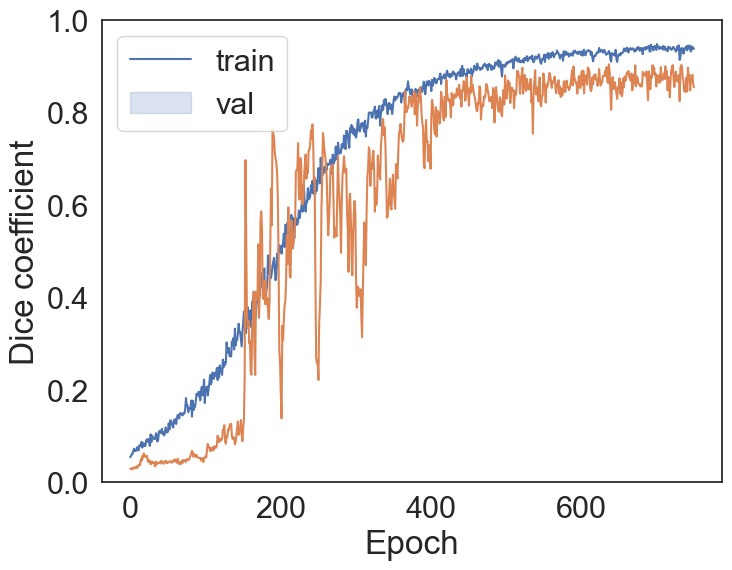

In [10]:
sns.set(font_scale=2, rc={'figure.figsize': (8,6)})
sns.set_style(style='white')
sns.lineplot(x=train_pdf.index, y=train_pdf['dice_coeff'])
sns.lineplot(x=val_pdf.index, y=val_pdf['dice_coeff'])
plt.legend(['train', 'val'], loc='upper left')
plt.ylim(0, 1)
plt.xlabel('Epoch')
plt.ylabel('Dice coefficient')
plt.savefig(f'<path to save created svg>/{file_name}.svg')